<a href="https://colab.research.google.com/github/washpereiraa/DesafioPrime/blob/main/AMZN_Baixa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando bibliotecas

#pandas e numpy
import pandas as pd
import numpy as np

#Bibliotecas de Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 

#treinamento e teste
from sklearn.model_selection import train_test_split

#Relatorios/Metricas
from sklearn.metrics import r2_score, classification_report, confusion_matrix

#graficos/plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
#Carregando Arquivos/DataFrame
dfAmazon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AMZN.csv")
dfAmazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,136.250000,136.610001,133.139999,133.899994,133.899994,7599900
1,2010-01-05,133.429993,135.479996,131.809998,134.690002,134.690002,8851900
2,2010-01-06,134.600006,134.729996,131.649994,132.250000,132.250000,7178800
3,2010-01-07,132.009995,132.320007,128.800003,130.000000,130.000000,11030200
4,2010-01-08,130.559998,133.679993,129.029999,133.520004,133.520004,9830500


In [ ]:
#numero de dias de trainamento

dfAmazon.shape

(2768, 7)

In [ ]:
dfAmazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2768 non-null   object 
 1   Open       2768 non-null   float64
 2   High       2768 non-null   float64
 3   Low        2768 non-null   float64
 4   Close      2768 non-null   float64
 5   Adj Close  2768 non-null   float64
 6   Volume     2768 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.5+ KB


In [ ]:
# Convertendo tipo objtect para date

dfAmazon['Date'] = pd.to_datetime(dfAmazon['Date'], infer_datetime_format=True)

In [ ]:
#numero de dias maximo a serem previstos

maxDias = 10  

In [ ]:
#Shift de dados no dataframe como numeros de dias a serem preditos

dfAmazon['Prediction-Low'] = dfAmazon['Low'].shift(- maxDias)

In [ ]:
dfAmazon.tail(11)

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction-Low
2757,2020-12-15,3181.010010,3188.500000,3130.489990,3165.120117,3165.120117,3323700,3282.469971
2758,2020-12-16,3176.010010,3247.000000,3163.679932,3240.959961,3240.959961,4427600,NaN
2759,2020-12-17,3250.000000,3263.510010,3221.000000,3236.080078,3236.080078,3474300,NaN
2760,2020-12-18,3243.989990,3249.419922,3171.600098,3201.649902,3201.649902,5995700,NaN
2761,2020-12-21,3200.010010,3226.969971,3166.000000,3206.179932,3206.179932,3836800,NaN
2762,2020-12-22,3202.840088,3222.000000,3180.080078,3206.520020,3206.520020,2369400,NaN
2763,2020-12-23,3205.000000,3210.129883,3184.169922,3185.270020,3185.270020,2093800,NaN
2764,2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,NaN
2765,2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,NaN
2766,2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,NaN


In [ ]:
#Separando dados de treinamento
xdadosTreinamento = dfAmazon.drop(['Low', 'Prediction-Low', 'Date'], 1, )[: - maxDias]
ydadosTreinamento = dfAmazon['Low'][: - maxDias]

In [ ]:
xdadosTreinamento.shape

(2758, 5)

In [ ]:
#Separando porcetagem de dados para treinamento (80% de teste e 20% de treinamento )

xTrain, xTest, yTrain, yTest = train_test_split(xdadosTreinamento, ydadosTreinamento, test_size = 0.20)

In [ ]:
yTrain.shape

(2206,)

In [ ]:
#Criando modelo DecisionTree

#objeto
tree = DecisionTreeRegressor()

#balancendo dados /fit
tree.fit(xTrain, yTrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Criando Modelo RegressionLinear

#objeto
lr = LinearRegression()

#Balanceando dados /fit
lr.fit(xTrain, yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Treinamento - prevendo Decision Treea

treePredecting = tree.predict(xTest)

#Metricas e Relatorios

print('Coeficiente de Determinação \n', (r2_score(yTest, treePredecting)) * 100)

Coeficiente de Determinação 
 99.96759610550039


In [ ]:
#Treinamento - prevendo Regressão Linear

lrPredecting = lr.predict(xTest)

#Metricas e Relatorios

print('Coeficiente de Determinação \n', (r2_score(yTest, lrPredecting)) * 100)

Coeficiente de Determinação 
 99.98887907292325


In [ ]:
previsao = dfAmazon.drop(['Prediction-Low', 'Date', 'Low' ], 1)[:- maxDias]
previsao = previsao.tail(maxDias)
previsao

,Open,High,Close,Adj Close,Volume
2748,3221.649902,3232.000000,3203.530029,3203.530029,3129300
2749,3205.459961,3228.639893,3186.729980,3186.729980,2892000
2750,3198.209961,3198.209961,3162.580078,3162.580078,2913600
2751,3156.479980,3180.760010,3158.000000,3158.000000,2751300
2752,3158.899902,3184.129883,3177.290039,3177.290039,3286300
2753,3167.889893,3174.429932,3104.199951,3104.199951,4100800
2754,3088.989990,3142.100098,3101.489990,3101.489990,3030200
2755,3096.659912,3118.669922,3116.419922,3116.419922,3064700
2756,3143.000000,3190.469971,3156.969971,3156.969971,4155800
2757,3181.010010,3188.500000,3165.120117,3165.120117,3323700


In [ ]:
 previsaoLR = lr.predict(previsao)
 previsaoLR

array([3180.32450076, 3157.54869866, 3148.83540997, 3124.160244  ,
       3138.75002998, 3092.87788884, 3051.06183782, 3079.80453455,
       3107.79481245, 3142.99745894])

In [ ]:
previsaoTree = tree.predict(previsao)
previsaoTree

array([3173.26001 , 3181.310059, 3158.76001 , 3141.689941, 3120.02002 ,
       3088.      , 3076.      , 2999.      , 3133.98999 , 3162.469971])

In [ ]:
Baixa = dfAmazon['Low'][2758:2768]

In [ ]:
Data = dfAmazon['Date'][2758:2768]

In [ ]:
#visualizando dados no dataFrame
dfPrevisao = pd.DataFrame({'Data': Data, 'Baixa': Baixa,'Previsao LR': previsaoLR, 'Previsao DT': previsaoTree})

In [ ]:
dfPrevisao


,Data,Baixa,Previsao LR,Previsao DT
2758,2020-12-16,3163.679932,3180.324501,3173.260010
2759,2020-12-17,3221.000000,3157.548699,3181.310059
2760,2020-12-18,3171.600098,3148.835410,3158.760010
2761,2020-12-21,3166.000000,3124.160244,3141.689941
2762,2020-12-22,3180.080078,3138.750030,3120.020020
2763,2020-12-23,3184.169922,3092.877889,3088.000000
2764,2020-12-24,3169.000000,3051.061838,3076.000000
2765,2020-12-28,3172.689941,3079.804535,2999.000000
2766,2020-12-29,3281.219971,3107.794812,3133.989990
2767,2020-12-30,3282.469971,3142.997459,3162.469971


In [ ]:
#setar index
dfPred = dfPrevisao
dfPred.set_index('Data', inplace = True)
dfPred

,Baixa,Previsao LR,Previsao DT
Data,,,
2020-12-16,3163.679932,3180.324501,3173.260010
2020-12-17,3221.000000,3157.548699,3181.310059
2020-12-18,3171.600098,3148.835410,3158.760010
2020-12-21,3166.000000,3124.160244,3141.689941
2020-12-22,3180.080078,3138.750030,3120.020020
2020-12-23,3184.169922,3092.877889,3088.000000
2020-12-24,3169.000000,3051.061838,3076.000000
2020-12-28,3172.689941,3079.804535,2999.000000
2020-12-29,3281.219971,3107.794812,3133.989990


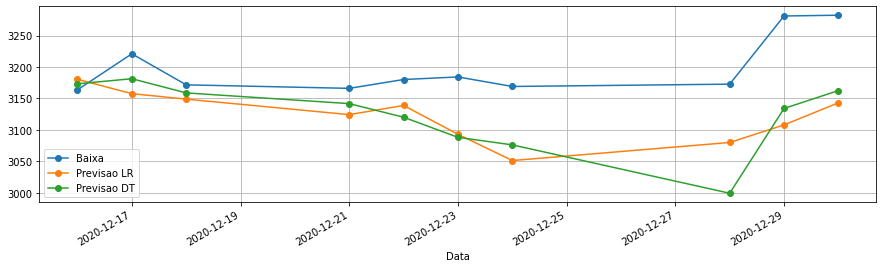

In [ ]:
#visualização grafica
columns = ['Baixa', 'Previsao LR', 'Previsao DT']
graph = dfPred[columns].plot(figsize=(15, 4), grid=True, marker = 'o')

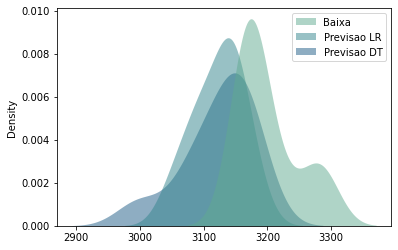

In [ ]:
sns.kdeplot(
   data=dfPrevisao,
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

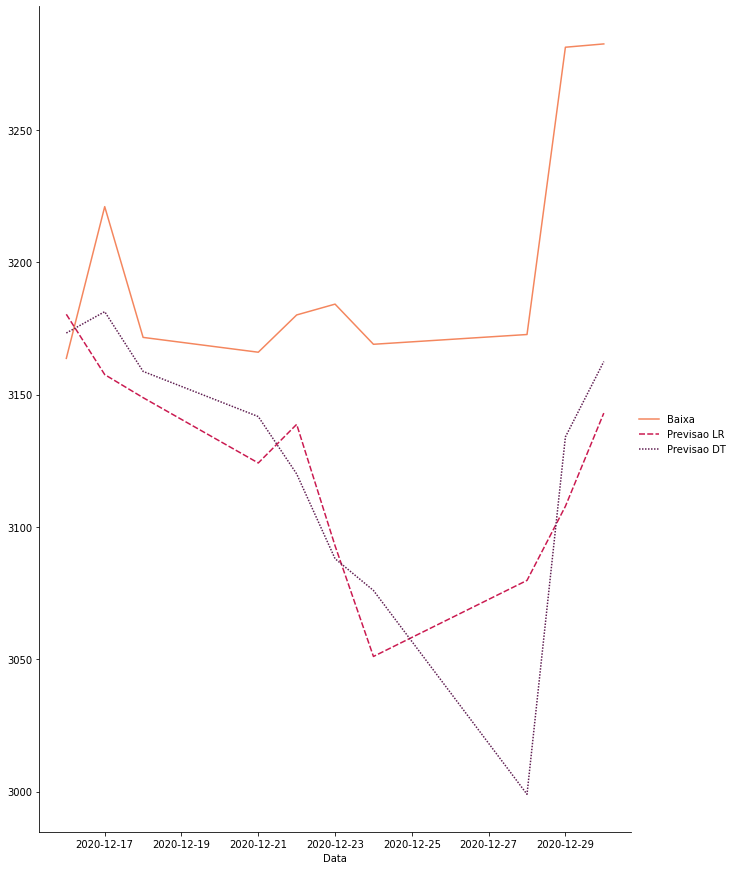

In [ ]:
sns.relplot(
    data=dfPrevisao,
    kind="line", palette='rocket_r',
    height = 12, aspect=.75, facet_kws=dict(sharex=False),
)

In [ ]:
}